<head>
    <style>
        h1{
            color: red ;
        }
    </style>
</head>
<h1> Introduction : </h1>
<p>Prendre en main le sujet de TP et voir comment générer des chiffres entiers aléatoires avec R</p>

<h1> Sujet du TP </h1>
<p>Un enfant collectionne des images de son équipe de football
préférée, images qu’il trouve dans des boîtes de céréales. Il y a
11 images différentes à gagner.</p>

In [1]:
# Code réalisé par Alexandre-Lebas le 10/09/2021

# Faire un premier tirage 
# Pour simplifier on ne donne pas de nom aux cartes mais on leur donne un numéro entre 1 et 11
tirage = sample(x=1:11,size=20,replace=T)
print(tirage)

 [1] 10  3  1  6  6  8  3 11  9 11  1  1  5  5  1 11  9  5  5  6


In [2]:
mode(tirage)

[1] "numeric"

# Question 1 :
<p> Combien faut-il acheter de boîtes de céréales en moyenne
pour avoir la collection complète des joueurs ? (on, suppose bien
entendu que l’on a la même probabilité d’obtenir chacune des
images dans chaque paquet de céréales</p>

<p> <a href="https://www.ilemaths.net/sujet-le-collectionneur-469931.html">Lien</a> pour aider à la démonstration de la formule a utilisé. </p>

In [3]:

# Question 1 :

# Utilisation d'une formule mathématique
moyenneObtenirTouteLesCartes = function(n){
    # Fonction qui calcule combien il faut acheter de boîtes en moyenne pour obtenir toutes les cartes.
    # n représente le nombre de cartes qu'il y a obtenir
    # k représente le nombre de cartes que l'on possède 
    k = 1
    somme1k = 0
    moyenne = 0 # Nombre de boite que l'on doit acheter en moyenne
    while (k<=n){
        somme1k = somme1k + (1/k)
        k = k+1
    }
    moyenne = n*somme1k
    # Une fois que l'on possède le nombre moyen de boîtes qu'il faut acheter il faut arrondir par excès.
    # Car la moyenne et un nombre réel et que le nombre de boîtes est entier.
    moyenne = ceiling(moyenne)
    # Renvoie le nombre de boîtes qu'il faut acheter en moyenne
    return(moyenne)
}
moyenneObtenirTouteLesCartes(11)

[1] 34

## Utilisation d'une autre méthode
<p>La première métohde utilise une formule mathématique qui explicite la moyenne theorique esseyant de calculer la moyenne avec la méthode utilisée en TP</p>

In [4]:

# Utilisation de la méthode vue en cours

nombreDeTirageNecessairePourAvoirTout = function(nombreDeCartes = 11){
    # Calcule combien de tirage son nécessaire pour obtenir toutes les cartes
    # nombreDeCartes représente le nombre de carte différentes que l'on doit posséder
    tirage = vector() # Représente la carte que l'on tire
    nombreTirages = 0 # Représente le nombre de tirages que l'on a réalisé
    cartes = c() # Cartes que l'on possède
    while (length(cartes)<nombreDeCartes){
        tirage = sample(1:nombreDeCartes,1)
        nombreTirages = nombreTirages+1
        if (!(tirage %in% cartes)){ # Si on ne possède pas encore la carte tirée
            cartes=c(tirage,cartes)
        }
    }
    return (nombreTirages)
}

In [5]:
nombreDeTirageNecessairePourAvoirTout(11)

[1] 34

In [6]:
moyenneDeTiragesPourAvoirTout = function(n,nombreDeCartes = 11){
    # Calcul de la moyenne de tirage que l'on doit réaliser pour avoir toutes les cartes
    # Pour cela on va utiliser n fois la fonction nombreDeTirageNecessairePourAvoirTout(nombreDeCartes)
    somme = 0
    i=1
    while (i<=n){
        somme = somme + nombreDeTirageNecessairePourAvoirTout(nombreDeCartes)
        i=i+1
    }
    # On renvoie la moyenne arrondie  car c'est un nombre réel et que le nombre de boîtes est entier.
    return (ceiling(somme/n))
}
moyenneDeTiragesPourAvoirTout(100)

[1] 32

# Question 2 :
<p> Développer une fonction qui réalise N tests.</p>

In [7]:

# Question 2 :

# Définir le nombre de tirages que l'on souhaite réaliser
nombreDeTirage = 50

In [8]:
NTest <- function(N){
    # Fonction qui réalise les N tirages aléatoires de carte 
    tirage = sample(x=1:11,size=N,replace = TRUE)
    # On renvoie les N tirages aléatoires
    return(tirage)
}

In [9]:
# On convertit les N tirages aléatoires en numeric
experience = as.numeric(NTest(nombreDeTirage))
print(experience)

 [1] 10  2  2  4 11 10  2  5  9  3  6  4  7  5 11  9  5  3  6 11  2  6  5  9  2
[26]  8  6  5 11  5  3  1  6 10 11  3 11  6  1  4  8  2  8 11  7  7  2  4  1  8


<h1> Question 3 : </h1>
<p> Réaliser un frame composé de la date de test et du nombre
de tirage.</p>

In [10]:
# Question 3 :

# On récupère la date 
Date = Sys.time()
print(Date)

[1] "2021-09-15 10:17:51 CEST"


In [11]:
# On crée le frame avec la date et le nombre de tirages
(frame = data.frame(Date,nombreDeTirage))

Date,nombreDeTirage
<dttm>,<dbl>
2021-09-15 10:17:51,50


In [12]:
# Réalisation d'une frame avec la date et l'heure pour chaque tirage
dataframeDateEtTest = function(N){
    # N represente le nombre de tirage que l'on souhaite réalisé
    i=1
    date = rep(Sys.time(),N)
    tirage = rep(0,N)
    while (i<=N){
        tirage[i]=sample(x=1:11,size=1)
        date[i]=Sys.time()
        i=i+1
    }
    (df<- data.frame(date,tirage))
    return(df)
}
frame1 = dataframeDateEtTest(nombreDeTirage)

# Question 4 :
<p>Afficher la structure du frame.</p>

In [13]:

# Question 4 :

print(frame)

                 Date nombreDeTirage
1 2021-09-15 10:17:51             50


In [14]:
print(frame1)

                  date tirage
1  2021-09-15 10:17:51     11
2  2021-09-15 10:17:51      4
3  2021-09-15 10:17:51     11
4  2021-09-15 10:17:51     10
5  2021-09-15 10:17:51     10
6  2021-09-15 10:17:51      9
7  2021-09-15 10:17:51      1
8  2021-09-15 10:17:51      1
9  2021-09-15 10:17:51      3
10 2021-09-15 10:17:51      7
11 2021-09-15 10:17:51     10
12 2021-09-15 10:17:51     11
13 2021-09-15 10:17:51      4
14 2021-09-15 10:17:51     10
15 2021-09-15 10:17:51      1
16 2021-09-15 10:17:51      2
17 2021-09-15 10:17:51      2
18 2021-09-15 10:17:51      8
19 2021-09-15 10:17:51      3
20 2021-09-15 10:17:51      2
21 2021-09-15 10:17:51      3
22 2021-09-15 10:17:51      4
23 2021-09-15 10:17:51      4
24 2021-09-15 10:17:51     10
25 2021-09-15 10:17:51      9
26 2021-09-15 10:17:51      1
27 2021-09-15 10:17:51     10
28 2021-09-15 10:17:51     11
29 2021-09-15 10:17:51      4
30 2021-09-15 10:17:51      3
31 2021-09-15 10:17:51      4
32 2021-09-15 10:17:51      3
33 2021-09

# Question 5 :
<p> Afficher la courbe des tirages.</p>

In [15]:

# Question 5 :

compterValeur = function(tirage){
    # Cette fonction permet de compter combien de fois nous avons chaque carte
    # Utile pour afficher le diagramme en baton
    i=1
    x = rep(0,11)
    while (i<length(tirage)){
        x[tirage[i]] = x[tirage[i]]+1
        i = i+1
    }
    # Renvoyer le vecteur x qui a compté combien de fois nous avons trouvé chaque carte
    return(x)
}

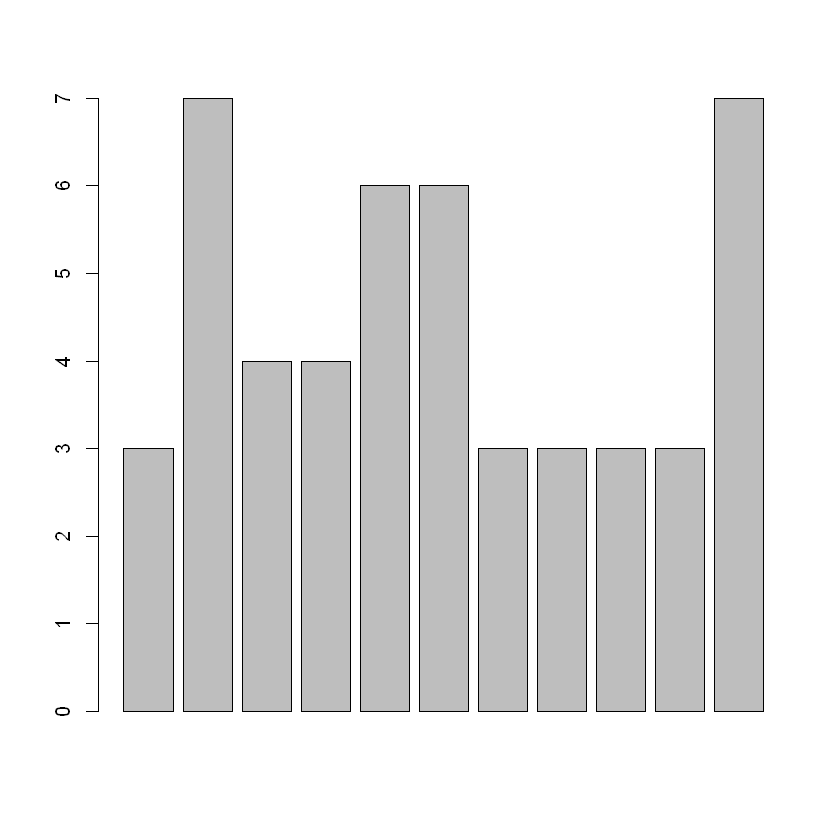

In [16]:
# Afficher le diagramme en bâton plus pratique pour voir combien de fois nous avons chaque carte
barplot(compterValeur(experience))

# Question 6 :
<p>Exporter le frame dans un fichier excel.<p>

In [17]:

# Question 6 :

# Installer le package nécessaire pour pouvoir travailler avec les fichiers excels
install.packages("writexl")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'writexl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\Rtmp2rgG4F\downloaded_packages


In [18]:
# Sauvegarder le frame dans un fichier excel nommé TP1.xlsx
library("writexl")
write_xlsx(frame1, "TP1.xlsx")